# Clustering

In [1]:
import pandas as pd

DATA = '../Data/Customers_new_features_and_drop.csv'

df = pd.read_csv(DATA)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

- https://scikit-learn.org/stable/modules/preprocessing.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

In [3]:
numerical_features = df.select_dtypes(include='number').columns
len(numerical_features)

32

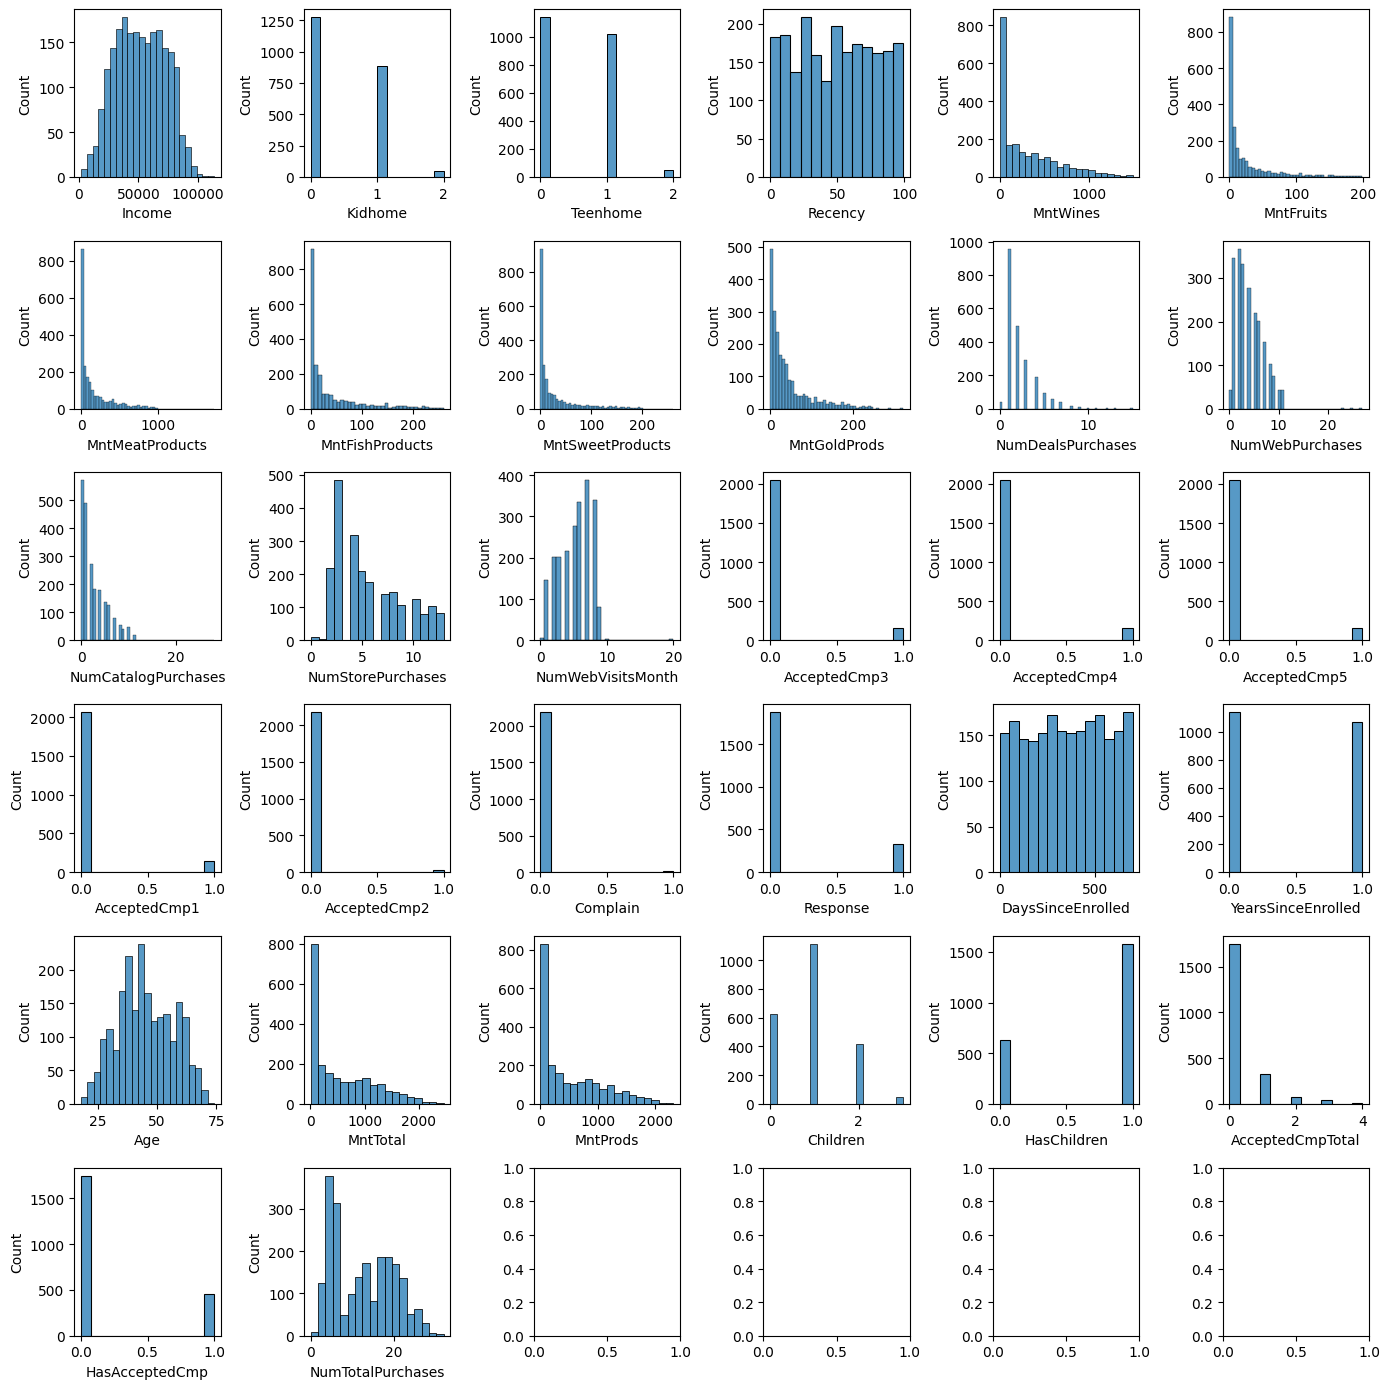

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(14,14), tight_layout=True)

for ax, feature in zip(axs.flatten(), numerical_features):
    sns.histplot(x=feature, ax=ax, data=df)

plt.show()

## Decidir quais colunas vão entrar em qual tipo de pré processamento

In [5]:
#OneHotEncolder para colunas categóricas
one_hot_cols = [
    "Education",
    "Marital_Status",
    "AgeGroup",
    "HasChildren",
    "HasAcceptedCmp",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Complain",
    "Response",
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "Children",
    "AcceptedCmpTotal",
]

#Standard para colunas com distribuição normal
standard_cols = [
    "Income",
    "Age",
]


#PowerTransform para colunas que parecem potência, tem um decaimento muito acentuado
power_cols = df.columns[
   df.columns.str.startswith("Mnt") | df.columns.str.startswith("Num")
].tolist()



minmax_cols = [
    col for col in df.columns if col not in one_hot_cols + standard_cols + power_cols
]

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(

                [
                    ('one-hot', OneHotEncoder(), one_hot_cols),
                    ('standard', StandardScaler(), standard_cols),
                    ('minmax', MinMaxScaler(), minmax_cols),
                    ('power', PowerTransformer(), power_cols)
                ]

                 )

preprocessing.fit_transform(df)

array([[ 0.        ,  0.        ,  1.        , ...,  1.30220223,
         1.2968208 ,  1.22117404],
       [ 0.        ,  0.        ,  1.        , ..., -1.4332939 ,
        -1.43141592, -1.31943784],
       [ 0.        ,  0.        ,  1.        , ...,  0.64222772,
         0.67226425,  1.02538786],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.07215329,
         1.11338759,  0.81760731],
       [ 0.        ,  0.        ,  0.        , ...,  0.7359911 ,
         0.74652409,  1.12466774],
       [ 0.        ,  0.        ,  0.        , ..., -0.42398552,
        -0.39686146, -0.5090171 ]])

In [7]:
df_scaled = pd.DataFrame(
                preprocessing.fit_transform(df),
                columns=preprocessing.get_feature_names_out()
)

df_scaled.head()

,one-hot__Education_2n Cycle,one-hot__Education_Basic,one-hot__Education_Graduation,one-hot__Education_Master,one-hot__Education_PhD,one-hot__Marital_Status_Partner,one-hot__Marital_Status_Single,one-hot__AgeGroup_18-30,one-hot__AgeGroup_31-45,one-hot__AgeGroup_46-60,...,power__MntSweetProducts,power__MntGoldProds,power__NumDealsPurchases,power__NumWebPurchases,power__NumCatalogPurchases,power__NumStorePurchases,power__NumWebVisitsMonth,power__MntTotal,power__MntProds,power__NumTotalPurchases
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.387173,1.089046,0.753752,1.332973,1.747828,-0.425453,0.700269,1.302202,1.296821,1.221174
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.976308,-0.947497,0.160834,-1.382228,-0.384719,-1.473644,-0.108417,-1.433294,-1.431416,-1.319438
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.546813,0.442997,-0.838557,1.332973,0.150188,1.239811,-0.527390,0.642228,0.672264,1.025388
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.525155,-1.052464,0.160834,-0.726457,-1.341911,-0.425453,0.300240,-1.131170,-1.067710,-0.877589
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.694250,-0.350932,1.453779,0.521339,0.518935,0.278071,-0.108417,0.131618,0.198038,0.356875


In [8]:
scaled_columns_not_one_hot = df_scaled.columns[~df_scaled.columns.str.startswith('one')]

scaled_columns_not_one_hot

Index(['standard__Income', 'standard__Age', 'minmax__Recency',
       'minmax__DaysSinceEnrolled', 'power__MntWines', 'power__MntFruits',
       'power__MntMeatProducts', 'power__MntFishProducts',
       'power__MntSweetProducts', 'power__MntGoldProds',
       'power__NumDealsPurchases', 'power__NumWebPurchases',
       'power__NumCatalogPurchases', 'power__NumStorePurchases',
       'power__NumWebVisitsMonth', 'power__MntTotal', 'power__MntProds',
       'power__NumTotalPurchases'],
      dtype='object')

In [9]:
len(scaled_columns_not_one_hot)

18

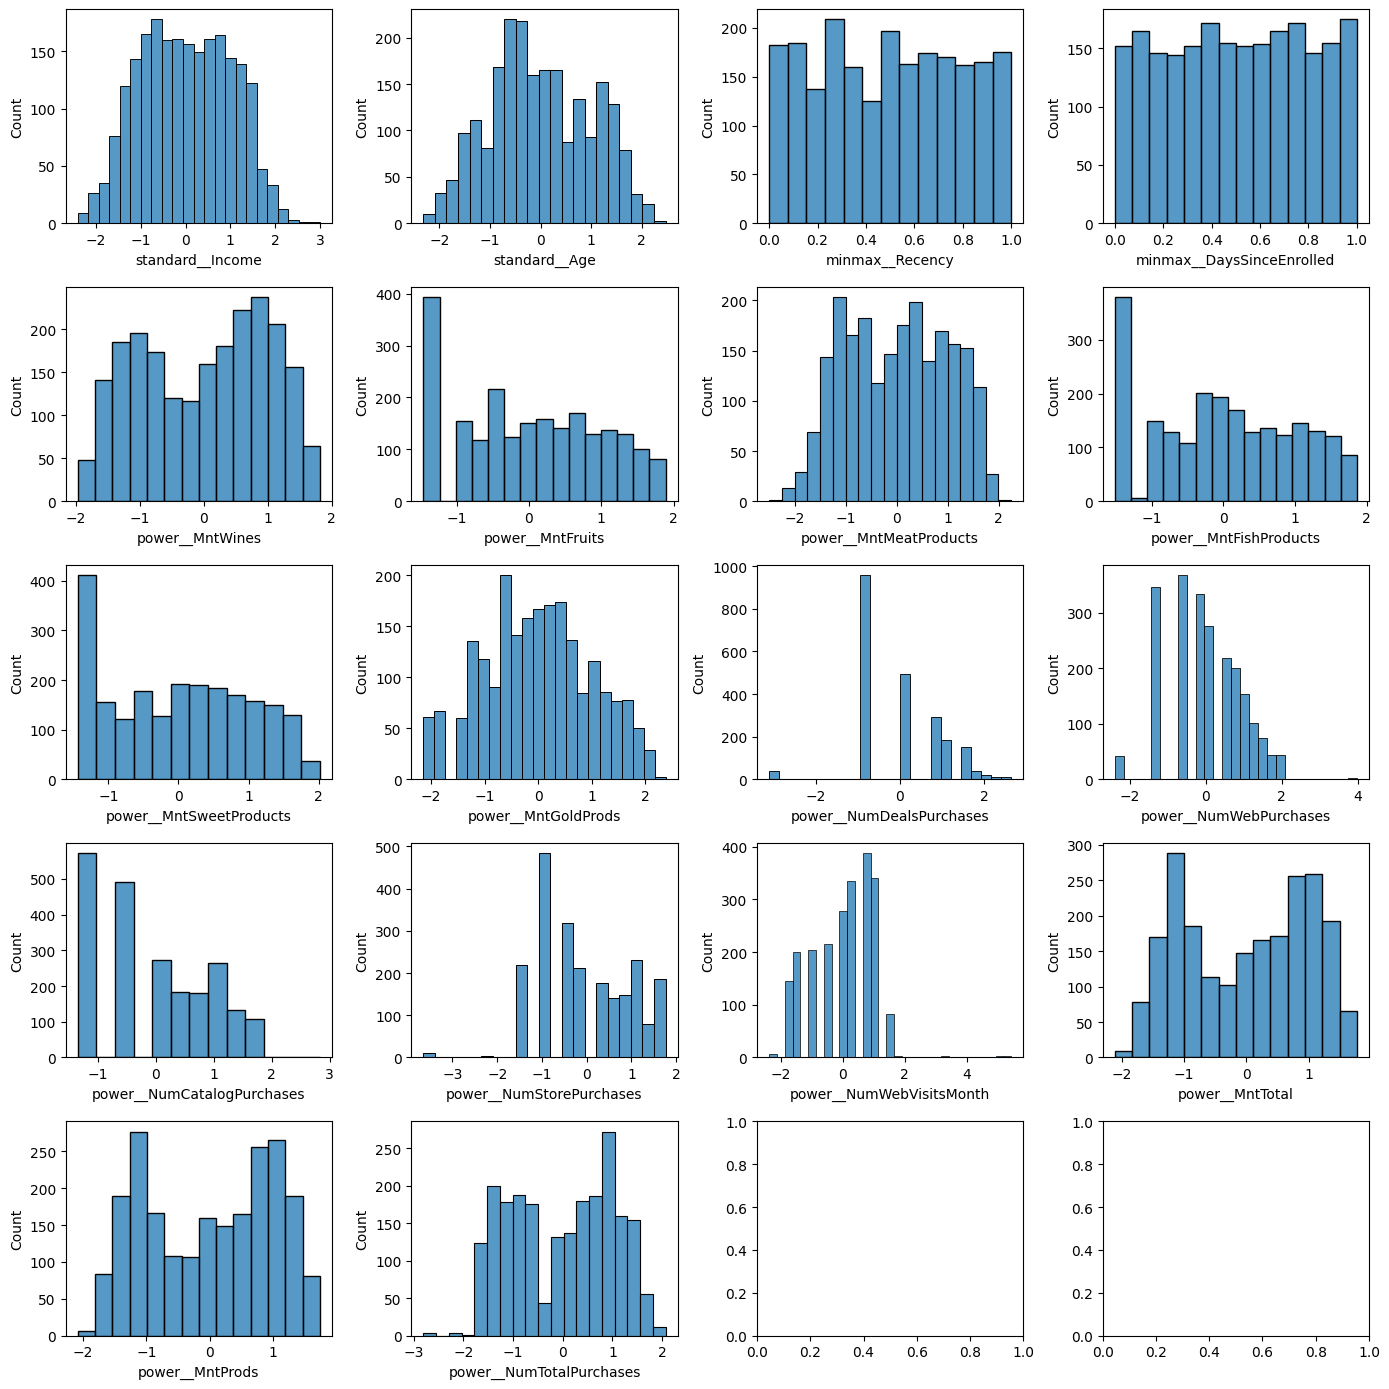

In [10]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(14,14), tight_layout=True)

for ax, feature in zip(axs.flatten(), scaled_columns_not_one_hot):
    sns.histplot(x=feature, ax=ax, data=df_scaled)

plt.show()

## Decidir quantos clusters vamos separar nossa base

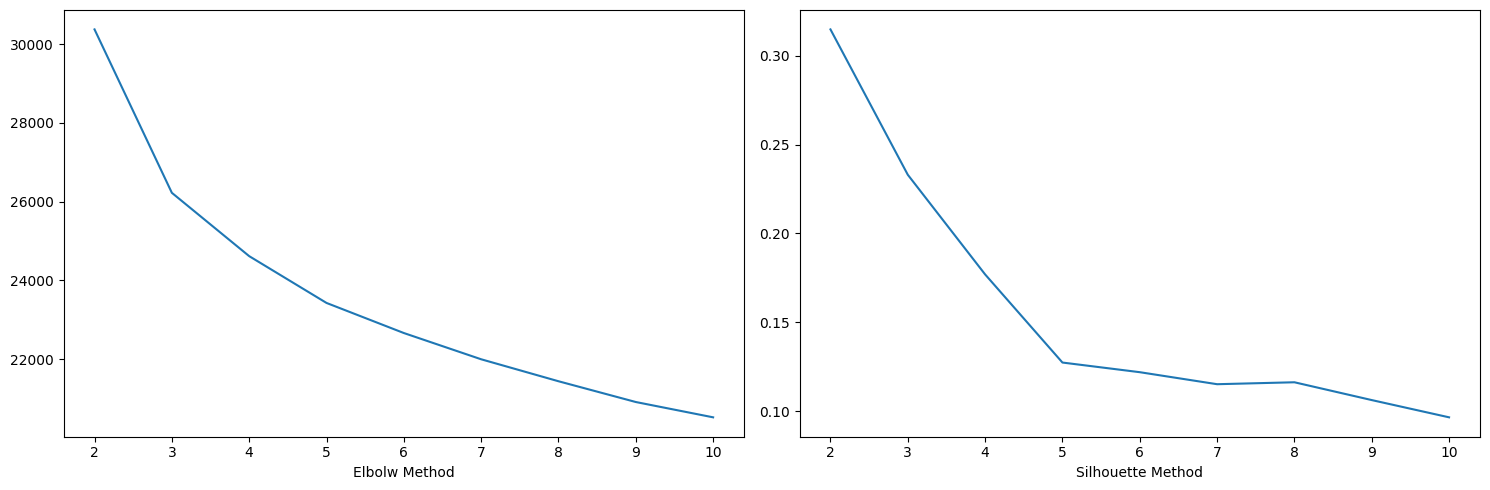

In [11]:
from Funcoes_Auxiliares import plot_elbow_silhouette

plot_elbow_silhouette(df_scaled)

## Realizar o pré processamento

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('clustering', KMeans(n_clusters = 3, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Response', 'Kidhome',
                                                   'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal']),
                                                 ('standard', Sta...
                                                   'DaysSinceEnrolled']),
                                                 ('power', PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal', 'MntProds',
                                                   'NumTotalPurchases'])])),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [13]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

In [14]:
pipeline.named_steps

{'preprocessing': ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                  ['Education', 'Marital_Status', 'AgeGroup',
                                   'HasChildren', 'HasAcceptedCmp',
                                   'AcceptedCmp1', 'AcceptedCmp2',
                                   'AcceptedCmp3', 'AcceptedCmp4',
                                   'AcceptedCmp5', 'Complain', 'Response',
                                   'Kidhome', 'Teenhome', 'YearsSinceEnrolled',
                                   'Children', 'AcceptedCmpTotal']),
                                 ('standard', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('minmax', MinMaxScaler(),
                                  ['Recency', 'DaysSinceEnrolled']),
                                 ('power', PowerTransformer(),
                                  ['MntWines', 'MntFruits', 'MntMeatProducts',
                            

In [15]:
pipeline['clustering'].labels_

array([0, 1, 0, ..., 0, 2, 1])

In [16]:
df_clustered = df.copy()
df_clustered['cluster'] = pipeline['clustering'].labels_
df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1529,1441,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,26,20,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,727,685,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,49,44,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,379,364,1,1,0,0,14,2


## Analise de cada variável por cluster

In [17]:
df_clustered['cluster'].value_counts().sort_index()

cluster
0    553
1    898
2    754
Name: count, dtype: int64

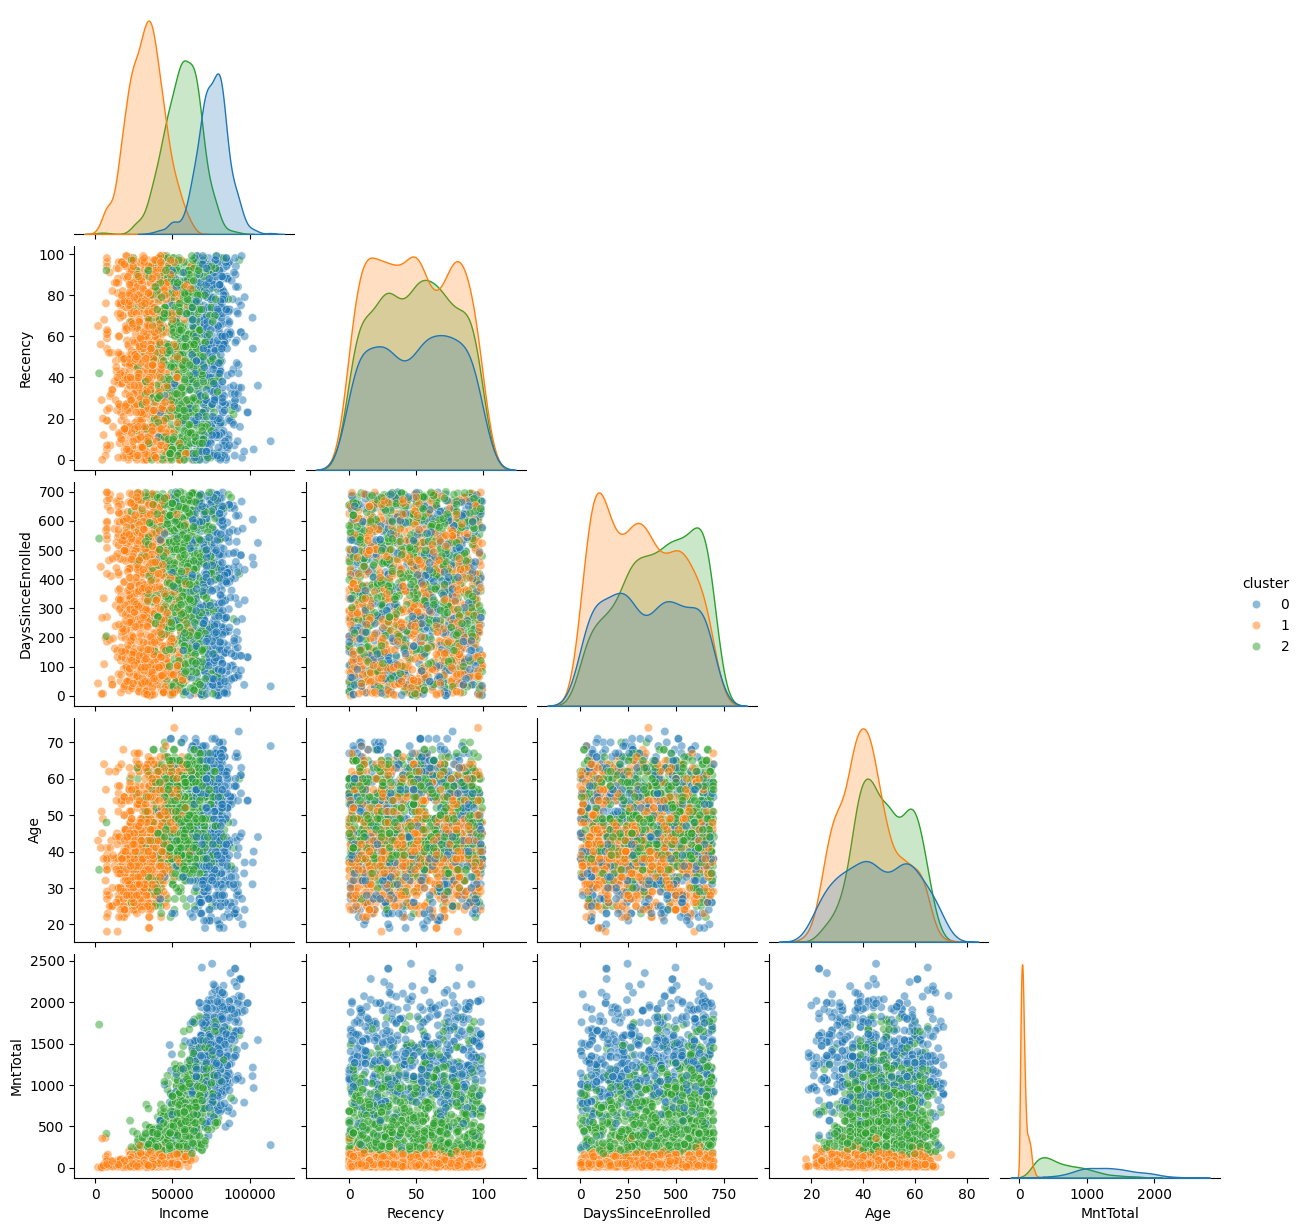

In [18]:
from Funcoes_Auxiliares import pairplot

columns_analysis = ['Income','Recency','DaysSinceEnrolled','Age','MntTotal']

pairplot(df_clustered, columns_analysis, hue_column='cluster')

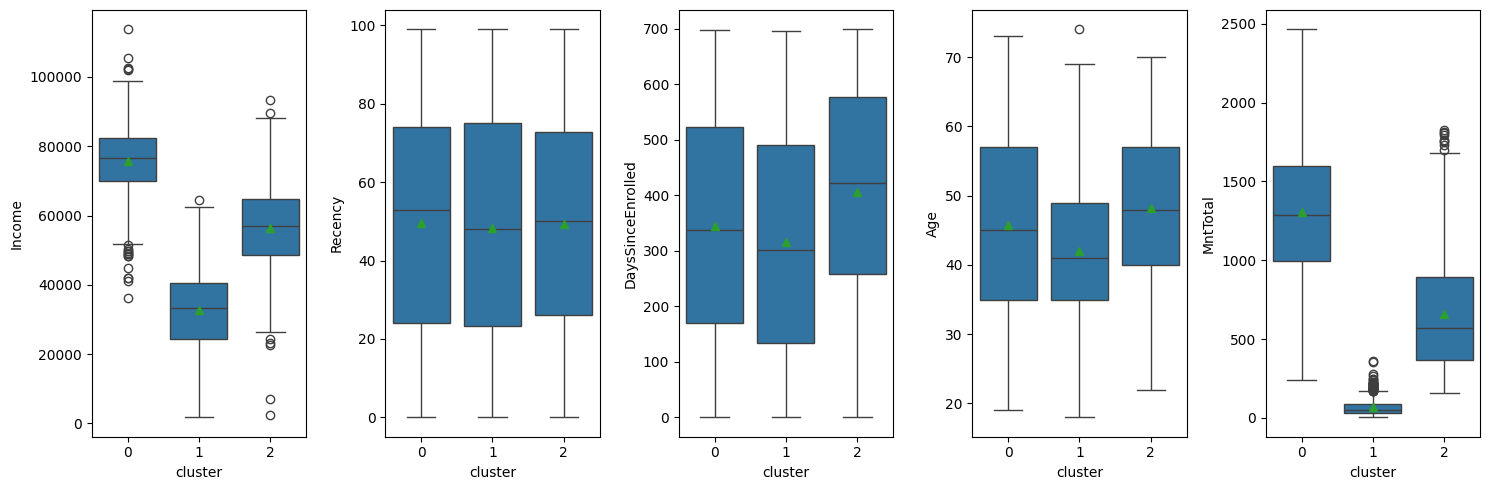

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15,5), tight_layout=True)

for ax, col in zip(axs, columns_analysis):
    sns.boxplot(x='cluster', y=col, data=df_clustered, ax=ax, showmeans=True)

In [20]:
columns = ['HasChildren','Marital_Status','Education','HasAcceptedCmp','Response','YearsSinceEnrolled']

cluster_diff_cols = ['MntTotal','Income']

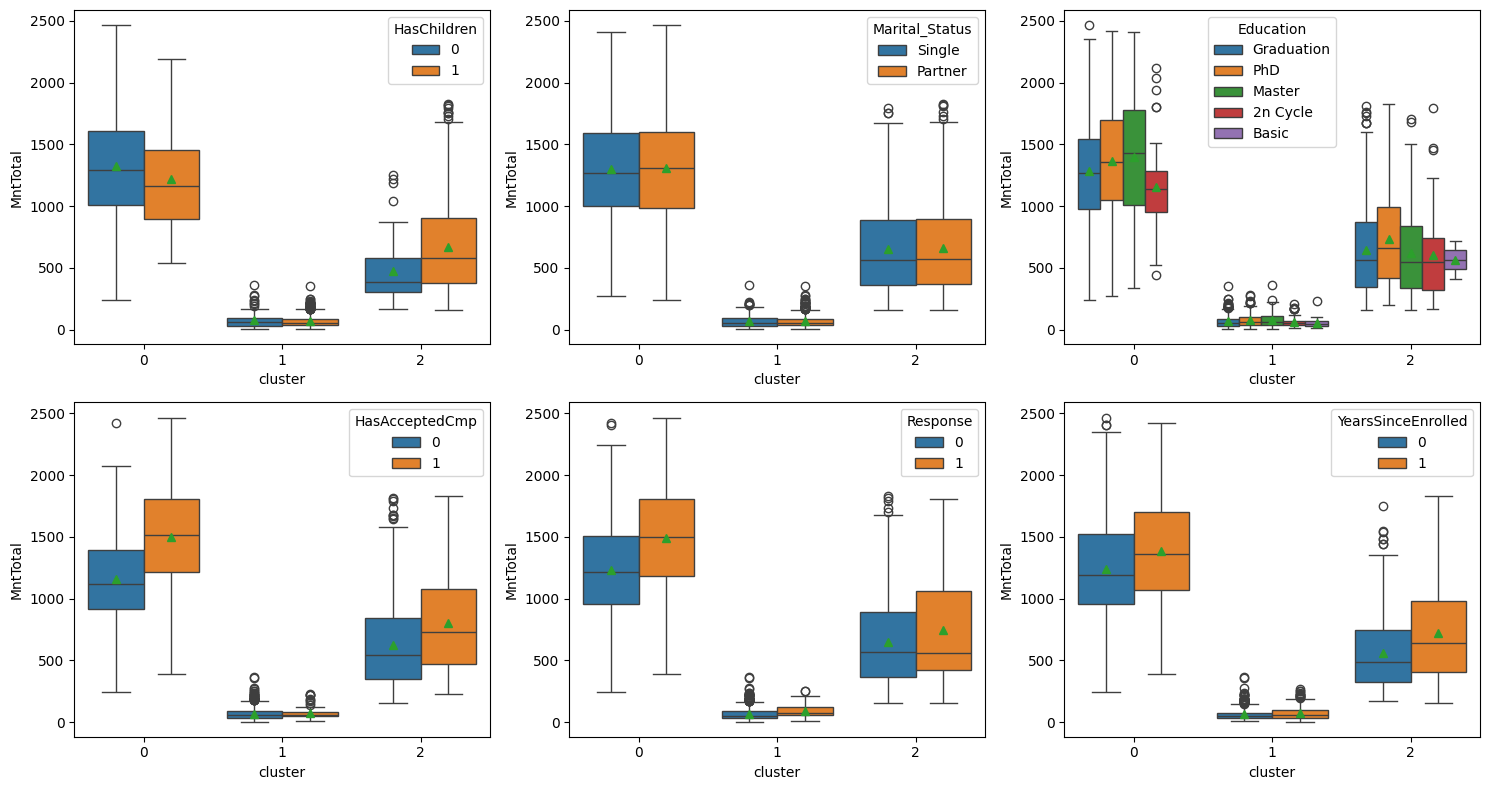

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,8), tight_layout=True)

for ax, col in zip(axs.flatten(), columns):
    sns.boxplot(x='cluster', y=cluster_diff_cols[0], data=df_clustered, ax=ax, showmeans=True, hue=col)

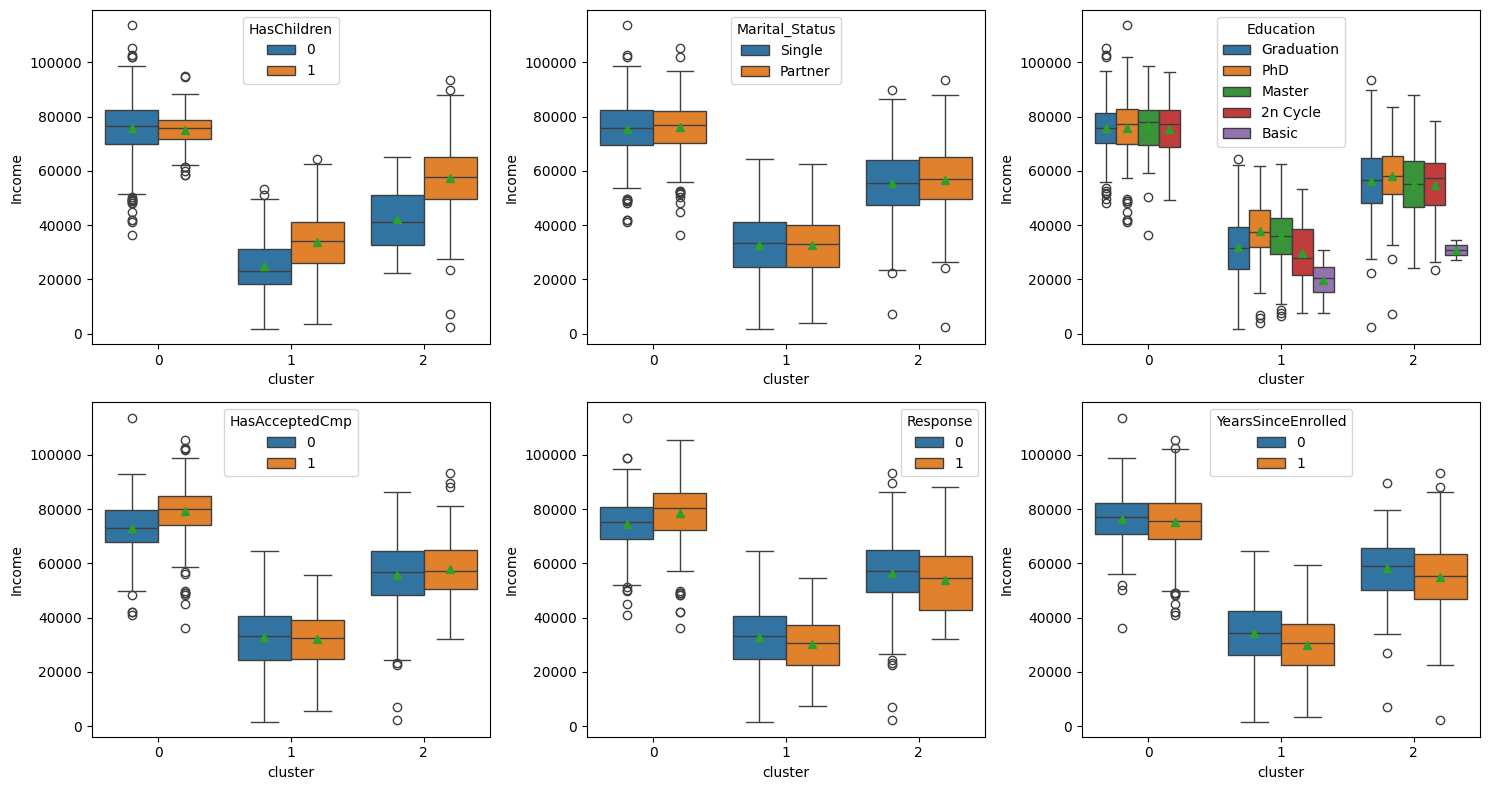

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,8), tight_layout=True)

for ax, col in zip(axs.flatten(), columns):
    sns.boxplot(x='cluster', y=cluster_diff_cols[1], data=df_clustered, ax=ax, showmeans=True, hue=col)

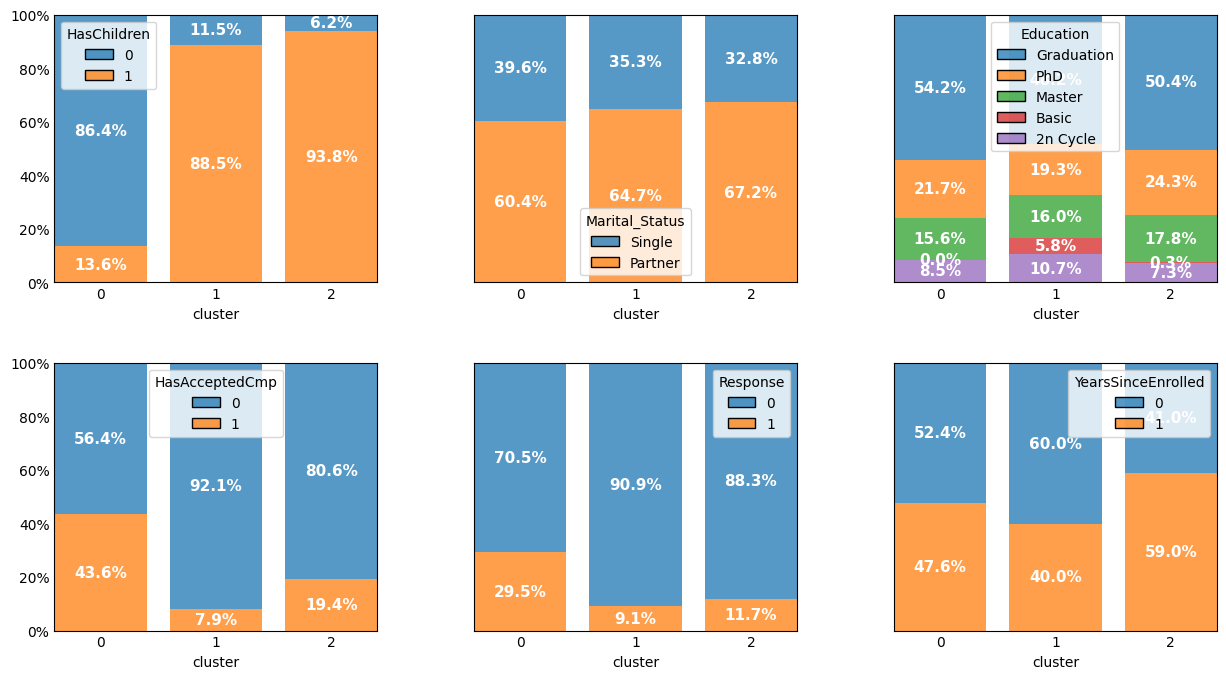

In [23]:
from Funcoes_Auxiliares import plot_columns_percent_by_cluster

plot_columns_percent_by_cluster(dataframe=df_clustered, columns=columns)

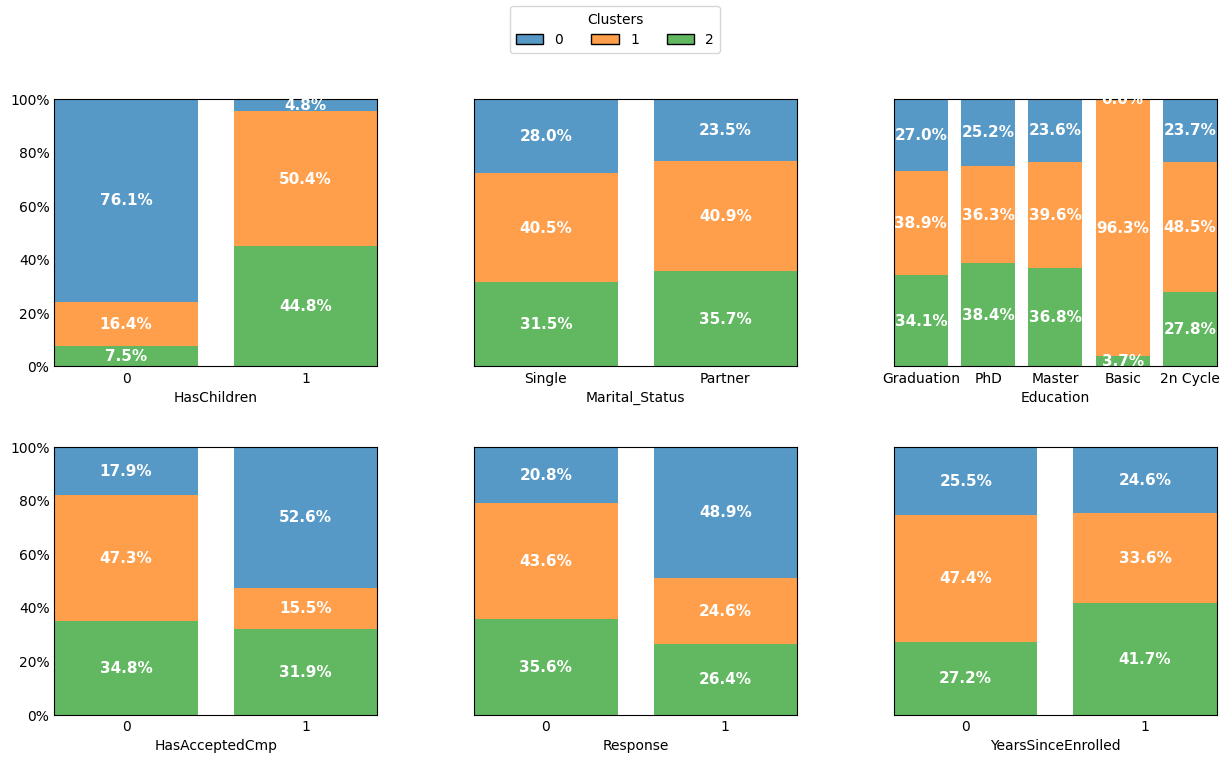

In [24]:
from Funcoes_Auxiliares import plot_columns_percent_hue_cluster

plot_columns_percent_hue_cluster(dataframe=df_clustered, columns=columns)

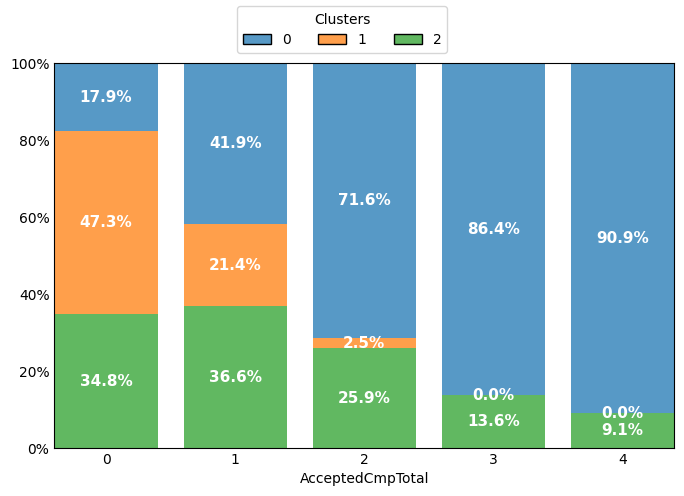

In [25]:
#Cluster 1 tem baixa propensão a converter campanha de marketing, o cluster 0 tem alta propensão

plot_columns_percent_hue_cluster(dataframe=df_clustered, columns=['AcceptedCmpTotal'], rows_cols=(1,1), figsize=(8,5))

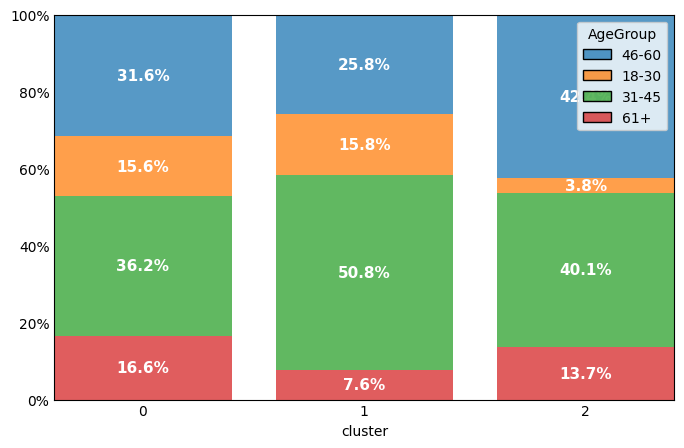

In [26]:
plot_columns_percent_by_cluster(dataframe=df_clustered, columns=['AgeGroup'], rows_cols=(1,1), figsize=(8,5))

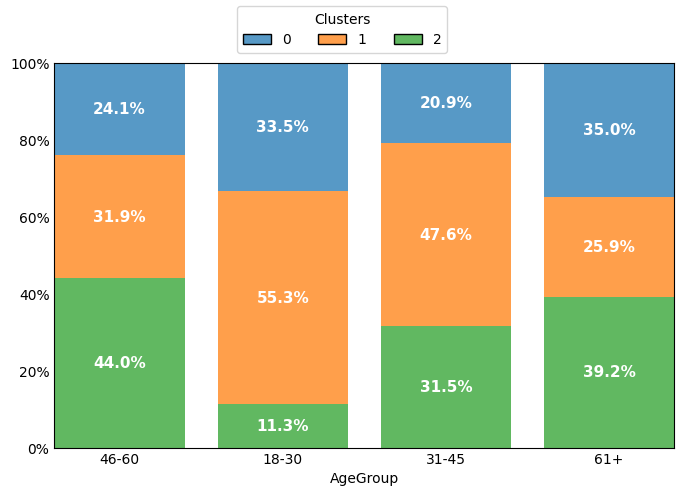

In [27]:
plot_columns_percent_hue_cluster(dataframe=df_clustered, columns=['AgeGroup'], rows_cols=(1,1), figsize=(8,5))

Análise por cluster:

- Cluster 0: 
  - Renda alta 
  - gasto alto 
  - muito provalmente não tem filhos (85% dos clientes do cluster não tem filhos, 76% dos clientes que não tem filhos estão no cluster)
  - mais propenso a aceitar campanhas (43% dos clientes do cluster aceitaram campanhas, maior % em relação aos outros clusters, 53% dos clientes que aceitaram campanhas estão no cluster)
  - cluster sem pessoas com escolaridade básica
  - sem um perfil de idade que se destaque
  

- Cluster 1: 
  - Renda baixa 
  - gasto baixo 
  - provalmente tem filhos (85% dos clientes do cluster tem filhos, 50% dos clientes que tem filhos estão no cluster)
  - baixa propensão a aceitar campanhas (92% dos clientes do cluster não aceitaram campanhas, 15% dos clientes que aceitaram campanhas estão no cluster)
  - único cluster com porcentagem significativa de pessoas com escolaridade básica
  - pessoas mais jovens (55% das pessoas entre 18-30 anos estão no cluster 1)
  

- Cluster 2: 
  - Renda intermediária
  - gasto intermediário
  - provalmente tem filhos (94% dos clientes do cluster tem filhos, 44% dos clientes que tem filhos estão no cluster)
  - pode aceitar campanhas (81% dos clientes do cluster não aceitaram campanhas, 32% dos clientes que aceitaram campanhas estão no cluster)
  - pessoas com idade mais elevada (A % de representatividade desse cluster ao longo das idades vai aumentando, começando com 11% entre 18-30 até chegar em 44% entre 46-60)